# Personbiler i Norge

Datasettet `personbildata.csv` er konstruert fra statistikkbanken "Bilparken", tabell 07849, fra statistisk senstralbyrå (https://www.ssb.no/statbank/list/bilreg/). Datasettet innholder tall på antall registrerte personbiler i årene 2008 til 2020, gruppert i henhold til drivstofftypene bensin, diesel, el., og annet (inkludert hybrid). Fra SSB får man data per kommune, men her har vi allerede aggregert dataene over alle kommuner slik at tallene representerer antall biler i hver drivstoff-kategori over hele landet. 

## Læringsmål: Kategoriske data

### Delmål
1. Lese inn .csv fil og gjøre seg kjent med et enkelt datasett
2. Plotte kategoriske data i stolpediagram 
3. Plotte utvikling av kategoriene over tid

*Hva er relevant for tellende vurdering? Erfaringen med å håndtere datasett i Python får du nytte av i den tellende prosjektoppgaven, og i resten av utdanningen din. Du skal ikke skrive kode selv på eksamen, men du må kunne lese, tolke og forklare utskrift og plott fra ulike statistikk-beregninger i Python.*

## Steg 1: Laste inn nødvendige python-pakker

Notebook-tips: Kjør koden som henter inn pakkene ved å trykke på feltet under og deretter knappen "Run" øverst på kommandolinja, eller bruk tastatursnarveien cmd + enter.

In [5]:
import pandas as pd # lese data fra csv-fil
import seaborn as sns # plotting
sns.set(style = 'whitegrid', font_scale = 1.5) # utseende av plott
import matplotlib.pyplot as plt # og mer plotting
import numpy as np # matematikk

## Steg 2: Lese inn og se på datasettet


In [6]:
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/python_felles/personbildata.csv',index_col=0) # lese inn datasettet (cvs-fil med radnavn)

In [3]:
df.shape  # Dimensjonen til datasettet

(13, 4)

In [4]:
df # se på hele datasettet (dette kan vi gjøre fordi dimensjonen er liten)

,bensin,diesel,el,annet
2008,1596852,597391,1693,126
2009,1550434,690560,1776,131
2010,1500841,804384,2068,144
2011,1448232,922986,3909,180
2012,1408198,1025220,8031,357
2013,1368625,1110621,17770,2070
2014,1328380,1186194,38652,999
2015,1295739,1243235,69134,1013
2016,1196148,1276947,97532,91054
2017,1139998,1294493,138983,144630


## Steg 3: Stolpediagram for andeler av hver drivstofftype i år 2020

In [31]:
df2020 = df.iloc[12,].to_frame().transpose()  # Hente ut rad 12 (2020) til ny pandas DataFrame
df2020

,bensin,diesel,el,annet
2020,950131,1246671,340002,272314


In [32]:
df2020 = df2020.div(df2020.sum(axis=1),axis=0) # Bytte ut antall med andel
df2020

,bensin,diesel,el,annet
2020,0.338231,0.443794,0.121035,0.096939


<AxesSubplot:>

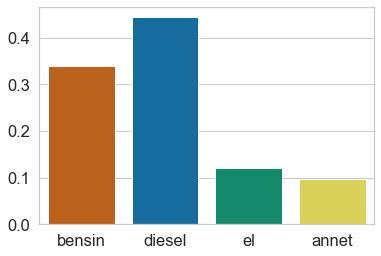

In [33]:
palette = sns.color_palette(["#d55e00","#0072b2","#009e73", "#f0e442"]) 
# palette = farger for de fire drivstoff-kategoriene
# Har hentet fargeblind-vennlige palett fra https://www.color-hex.com/color-palette/49436

sns.barplot(data = df2020, palette = palette) 
# Plotter et enkelt stolpediagram (barplot) med Seaborn-modulen

In [8]:
df2020sort = df2020.sort_values(by = 2020,axis=1,ascending=False)
# Sorterer dataene fra største til minste andel
df2020sort

,diesel,bensin,el,annet
2020,0.443794,0.338231,0.121035,0.096939


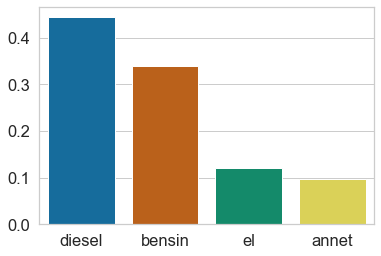

In [11]:
# Plotter de sorterte dataene (og sorterer fargene) 
palette_sort = sns.color_palette(["#0072b2","#d55e00","#009e73", "#f0e442"])

sns.barplot(data = df2020sort,palette = palette_sort)


## Steg 4: Plotte utvikling  over tid

(2008.0, 2020.0)

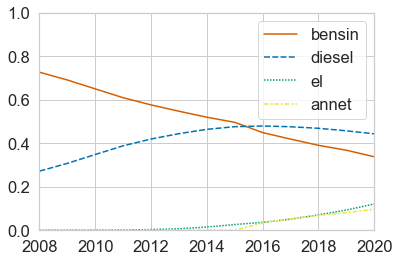

In [34]:
df_andel = df.div(df.sum(axis=1),axis=0) # Lager et datasett med årlige andeler i stedet for antall

# Plotter utvikling i andeler av hver kategori med et Seaborn lineplot
sns.lineplot(data = df_andel,palette = palette)
plt.ylim(0,1); plt.xlim(2008,2020)